<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ресемплирование</a></span></li><li><span><a href="#Исследование-на-тренды-и-сезонность" data-toc-modified-id="Исследование-на-тренды-и-сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование на тренды и сезонность</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка к обучению</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Анализ-моделей-на-тестовой-выборке" data-toc-modified-id="Анализ-моделей-на-тестовой-выборке-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ моделей на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случаный-лес" data-toc-modified-id="Случаный-лес-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Случаный лес</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Наивная-модель" data-toc-modified-id="Наивная-модель-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Наивная модель</a></span></li><li><span><a href="#Табличка" data-toc-modified-id="Табличка-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Табличка</a></span></li></ul></li><li><span><a href="#Графики" data-toc-modified-id="Графики-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Графики</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Изучим данные представленные сервисом.

## Подготовка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # для поиска оптимальных параметров
from sklearn.metrics import mean_squared_error # для расчета MSE и RMSE
from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/datasets/taxi.csv') 

def info_df(df):  
    display(df.head()) #первые пять строк 
    display(df.info()) #общую информацию 
    display(df.describe()) #статистическую информацию 
    display(df.isna().sum()) #пропуски 
    display(df.duplicated().sum()) #дубликаты 
                    
display(info_df(df)) 

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


None

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


datetime      0
num_orders    0
dtype: int64

0

None

In [39]:
df.sort_values(by=['datetime'], ascending=False)

,datetime,num_orders
26495,2018-08-31 23:50:00,53
26494,2018-08-31 23:40:00,39
26493,2018-08-31 23:30:00,27
26492,2018-08-31 23:20:00,24
26491,2018-08-31 23:10:00,32
...,...,...
4,2018-03-01 00:40:00,32
3,2018-03-01 00:30:00,20
2,2018-03-01 00:20:00,28
1,2018-03-01 00:10:00,14


Видим небольшой файл, синтаксических и стилистических нарушений нет, дубликатов и пропусков тоже нет. Типы данных даты представлены - объектом. У столбца Число заказов есть выделяющееся максимальное значение - но это вполне может бвть объяснимо : например на определённую дату  много заказов. Столбец с датами закозов представлен только 2018 годом, и начинается с марта месяца по август.

## Анализ

### Ресемплирование

In [40]:
# Изменим тип данных datetime с object на datetime64
df['datetime'] =  pd.to_datetime(df['datetime']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [41]:
# Установим индекс таблицы равным столбцу datetime.
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
#df = df.set_index('datetime') 
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Чтобы проверить, в хронологическом ли порядке расположены даты и время, посмотрим атрибут индекса таблицы is_monotonic (англ. «монотонный»). Если порядок соблюдён, атрибут вернёт True, если нет — False. 

In [42]:
display(df.index.is_monotonic)

True

<AxesSubplot:xlabel='datetime'>

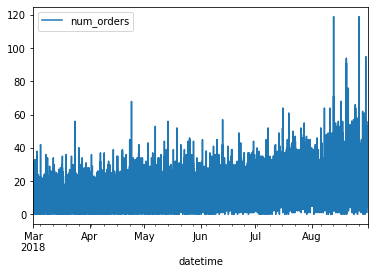

In [43]:
# Построим график временного ряда, возьмём весь период датасета
df.sort_index(inplace=True) 
df['2018-03':'2018-08'].plot() 

По таким данным ничего не понятно.

In [44]:
# ресемплируем по часу
df.sort_index(inplace=True) 
df = (df.resample('1H')).sum()  
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


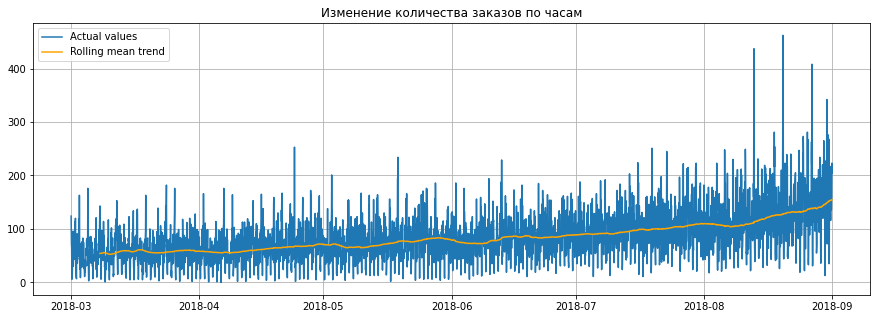

In [45]:
rolling_mean = df.rolling(24*7).mean()

plt.figure(figsize=(15,5))
plt.title("Изменение количества заказов по часам")

plt.plot(df, label="Actual values")
plt.plot(rolling_mean, "g", label="Rolling mean trend", color='orange')
plt.legend(loc="upper left")
plt.grid(True)

Скользящее среднее взято с размером окна в 1 неделю. Виден рост заказов, особенно в летний период.

### Исследование на тренды и сезонность

Чтобы лучше понимать временной ряд, разберём тренды и сезонность. 

Тренд (англ. trend) — плавное изменение среднего значения ряда без повторяющихся закономерностей. Например, ежегодное увеличение объёма продаж авиабилетов. 

Сезонность (англ. seasonality) — циклично повторяющиеся закономерности во временном ряду. Допустим, рост продаж авиабилетов летом. 

Тренды и сезонность зависят от масштаба данных. 

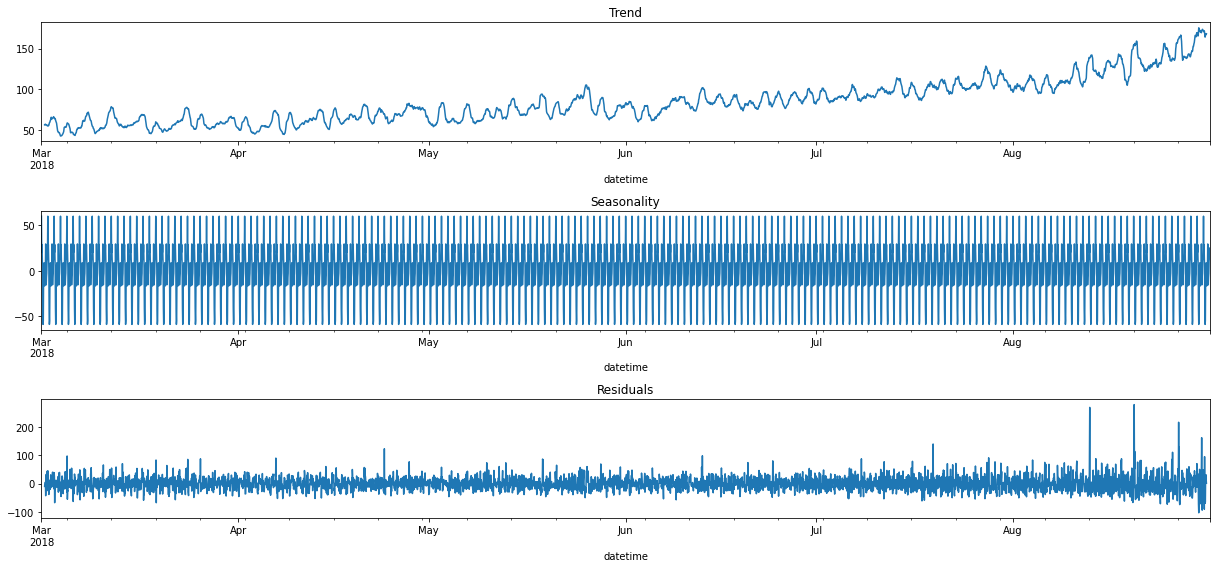

In [46]:
decomposed = seasonal_decompose(df) 

plt.figure(figsize=(17, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

На графике тренда видна возрастающая зависимость. На графике сезонности видны множественные пики. Скорее всего это по дням зависимость. Нужно смотреть детальнее.

<AxesSubplot:title={'center':'Сезонность заказов в течение 7 дней'}, xlabel='datetime'>

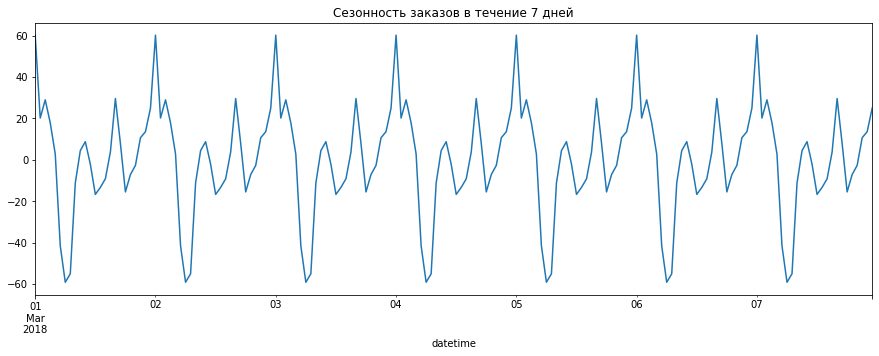

In [47]:
plt.figure(figsize=(15,5))
plt.title("Сезонность заказов в течение 7 дней")
decomposed.seasonal['2018-03-01':'2018-03-7'].plot(ax=plt.gca())

<AxesSubplot:xlabel='datetime'>

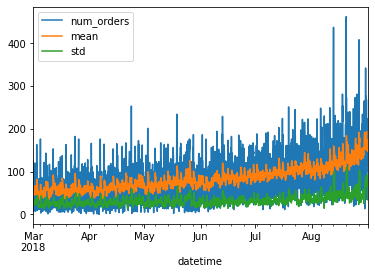

In [48]:
df['mean'] = df['num_orders'].rolling(15).mean() 
df['std'] = df['num_orders'].rolling(15).std() 
df.plot() 

Очевидно, что у нас есть тренд (различное среднее) в вышеприведенных рядах, этот визуальный подход не всегда дает точные результаты. Лучше подтвердить наблюдения, используя некоторые статистические тесты.

Определить является ли данный ряд стационарным, или нет поможет расширенный тест Дики — Фуллера ADF (Augmented Dickey Fuller).

Тест Дики Фуллера - один из самых популярных статистических тестов. Его можно использовать для определения наличия единичного корня в ряду и, следовательно, помочь нам понять, является ли ряд стационарным или нет. Нулевой и альтернативной гипотезой этого теста являются:

Нулевая гипотеза: ряд имеет единичный корень (значение a = 1).
Если не удалось отклонить, он предполагает, что временной ряд имеет единичный корень, то есть он нестационарный. Он имеет некоторую временную структуру.

Альтернативная гипотеза: ряд не имеет единичного корня.
Нулевая гипотеза отвергается; он предполагает, что временной ряд не имеет единичного корня, то есть он является стационарным. Он не имеет временной структуры.

Мы интерпретируем этот результат, используя значение p из теста. Значение p ниже порогового значения (например, 5% или 1%) предполагает, что мы отвергаем нулевую гипотезу (стационарную), в противном случае значение p выше порогового значения указывает на то, что мы не можем отклонить нулевую гипотезу (нестационарную).

In [49]:
# Определяем функцию для теста ADF
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    # Выполняем тест Дики-Фуллера:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# применяем к ряду тест adf 
adf_test(df['num_orders'])

Results of Dickey-Fuller Test:
Test Statistic                   -3.068924
p-value                           0.028940
#Lags Used                       30.000000
Number of Observations Used    4385.000000
Critical Value (1%)              -3.431842
Critical Value (5%)              -2.862199
Critical Value (10%)             -2.567121
dtype: float64


pvalue меньше 0.05 и соответственно ниже порогового значения, поэтому отвергаем нулевую гипотезу. Ряд стационарный.

**Вывод**

Проанализировали джанные, узнали точно, что ряд стационарный. Есть тренд - изменение кол-ва заказов от сезонности и времени суток.

## Обучение

### Подготовка к обучению

Для начала создадим дополнительные признаки. Нам нужно спрогнозировать количество заказов такси на следующий час. Значит такие признаки как день недели, месяц и год включать не нужно. Добавим лаги на 24 часа, скользяещее среднее с горизонтом в 7 часов, час и день.

In [50]:
def make_features(data, max_lag, rolling_mean_size): 
    data = df.copy()
    data['hour'] = data.index.hour 
    data['dayofweek'] = data.index.dayofweek
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
   
    for lag in range(1, max_lag + 1): 
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag) 
    return data
  
    
df_1 = make_features(df, 2, 24) 

df_1.head()

,num_orders,mean,std,hour,dayofweek,rolling_mean,lag_1,lag_2
datetime,,,,,,,,
2018-03-01 00:00:00,124,NaN,NaN,0,3,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN,1,3,NaN,124.0,NaN
2018-03-01 02:00:00,71,NaN,NaN,2,3,NaN,85.0,124.0
2018-03-01 03:00:00,66,NaN,NaN,3,3,NaN,71.0,85.0
2018-03-01 04:00:00,43,NaN,NaN,4,3,NaN,66.0,71.0


По исходным данным создадим обучающую (train) и тестовую (test) выборки. Перемешивать выборки в задаче прогнозирования временного ряда нельзя. Данные обучающей выборки должны предшествовать данным тестовой. Иначе тестирование модели будет некорректным: модель не должна обучаться на данных из будущего.
Функция train_test_split() из модуля sklearn.model_selection по умолчанию перемешивает данные. Поэтому укажем аргумент shuffle (с англ. «перетасовывать») равным False, чтобы разделить данные корректно.


In [51]:
train, test = train_test_split(df_1, shuffle=False, test_size=0.1)
train = train.dropna() 

print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())
print(train.info())

2018-03-02 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3950 entries, 2018-03-02 00:00:00 to 2018-08-13 13:00:00
Freq: H
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    3950 non-null   int64  
 1   mean          3950 non-null   float64
 2   std           3950 non-null   float64
 3   hour          3950 non-null   int64  
 4   dayofweek     3950 non-null   int64  
 5   rolling_mean  3950 non-null   float64
 6   lag_1         3950 non-null   float64
 7   lag_2         3950 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 277.7 KB
None


In [52]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 442 entries, 2018-08-13 14:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    442 non-null    int64  
 1   mean          442 non-null    float64
 2   std           442 non-null    float64
 3   hour          442 non-null    int64  
 4   dayofweek     442 non-null    int64  
 5   rolling_mean  442 non-null    float64
 6   lag_1         442 non-null    float64
 7   lag_2         442 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 31.1 KB
None


Данные разделены корректно. Пропусков нет, Наннов нет, можно работать дальше.

In [53]:
# признаки и цель для обучающей выборки 
features_train = train.drop(['num_orders'], axis=1) 
target_train = train['num_orders'] 
 
# признаки и цель для тестовой выборки 
features_test = test.drop(['num_orders'], axis=1) 
target_test = test['num_orders'] 
 
# посмотрим на размер новых даатасетов, на вход функция принимает все датасеты сразу
def info_df(features_train, features_test, target_train, target_test): 
    df_all = [features_train, features_test, target_train, target_test]
    for i in df_all:
        print(i.shape)
                    
display(info_df(features_train, features_test, target_train, target_test))

(3950, 7)
(442, 7)
(3950,)
(442,)


None

Подготовили данные к обучению, разделили выборки и переходим к обучению.

### Обучение

Справка: neg_mean_squared_error - rmse - отрицательное значение для "mean_squared_error". Чем ближе значение к нулю, тум лучше.

#### Линейная регрессия

Применим TimeSeriesSplit для временных рядов.

In [54]:
lr = LinearRegression() # объявляем модель
lr_params = {'fit_intercept':[True,False], 'normalize':[True,False]} # объявляем параметры
tscv = TimeSeriesSplit(n_splits=4)
lr_grid = GridSearchCV(lr, lr_params, cv=tscv, scoring='neg_mean_squared_error')
lr_grid.fit(features_train, target_train)

display("RMSE составляет", lr_grid.best_score_)
display('Наилучшие подобранные параметры', lr_grid.best_params_)

'RMSE составляет'

-997.5496629419772

'Наилучшие подобранные параметры'

{'fit_intercept': False, 'normalize': True}

#### Случайный лес

In [55]:
forest = RandomForestRegressor(random_state=12345) # объявляем модель
forest_params = {'n_estimators': range(1, 10), 'max_depth': range(1,5)} # объявляем параметры
tscv = TimeSeriesSplit(n_splits=4)
forest_grid = GridSearchCV(forest, forest_params, cv=tscv, scoring='neg_mean_squared_error') # объявляем подбор гиперпараметров
forest_grid.fit(features_train, target_train) # учим модель

display("RMSE составляет", forest_grid.best_score_)
display('Наилучшие подобранные параметры', forest_grid.best_params_)

'RMSE составляет'

-902.4990118229111

'Наилучшие подобранные параметры'

{'max_depth': 4, 'n_estimators': 7}

#### Дерево решений

In [56]:
dtr = DecisionTreeRegressor(random_state=12345) # объявляем модель
dtr_params = {'max_depth': range(1,15), 'min_samples_split': range(2,7)} 
tscv = TimeSeriesSplit(n_splits=4)
dtr_grid = GridSearchCV(dtr, dtr_params, cv=tscv, scoring='neg_mean_squared_error') # объявляем подбор гиперпараметров
dtr_grid.fit(features_train, target_train) # учим модель

display("RMSE составляет", dtr_grid.best_score_)
display('Наилучшие подобранные параметры', dtr_grid.best_params_)

'RMSE составляет'

-808.1238909435733

'Наилучшие подобранные параметры'

{'max_depth': 8, 'min_samples_split': 6}

#### CatBoost

In [57]:
cbr = CatBoostRegressor()
cbr_params = {'depth': [1, 3]} #'learning_rate': [0.03, 0.04] ОЧЕНЬ ДОЛГО УЧИТСЯ!
tscv = TimeSeriesSplit(n_splits=4)
cbr_grid = GridSearchCV(cbr, cbr_params, cv=tscv, scoring='neg_mean_squared_error') # объявляем подбор гиперпараметров
cbr_grid.fit(features_train, target_train) # учим модель

display("RMSE составляет", cbr_grid.best_score_)
display('Наилучшие подобранные параметры', cbr_grid.best_params_)

Learning rate set to 0.039446
0:	learn: 29.2749158	total: 345us	remaining: 345ms
1:	learn: 29.0717269	total: 720us	remaining: 360ms
2:	learn: 28.8823602	total: 965us	remaining: 321ms
3:	learn: 28.7059490	total: 1.15ms	remaining: 286ms
4:	learn: 28.5416725	total: 1.34ms	remaining: 266ms
5:	learn: 28.3729279	total: 1.52ms	remaining: 252ms
6:	learn: 28.2186987	total: 1.72ms	remaining: 245ms
7:	learn: 28.0454536	total: 1.93ms	remaining: 240ms
8:	learn: 27.8956758	total: 2.12ms	remaining: 233ms
9:	learn: 27.7354500	total: 2.31ms	remaining: 229ms
10:	learn: 27.5827789	total: 2.5ms	remaining: 225ms
11:	learn: 27.4418788	total: 2.71ms	remaining: 224ms
12:	learn: 27.3536179	total: 2.86ms	remaining: 217ms
13:	learn: 27.2186997	total: 3.04ms	remaining: 214ms
14:	learn: 27.0932065	total: 3.24ms	remaining: 213ms
15:	learn: 27.0096847	total: 3.41ms	remaining: 210ms
16:	learn: 26.8945801	total: 3.62ms	remaining: 209ms
17:	learn: 26.7778637	total: 3.79ms	remaining: 207ms
18:	learn: 26.6532720	total: 3

'RMSE составляет'

-583.6205130354587

'Наилучшие подобранные параметры'

{'depth': 3}

#### LGBM

In [58]:
LGBMR = LGBMRegressor()
LGBMR_params = {'n_jobs': range(1, 4), 'learning_rate':[0.01, 0.04]}
tscv = TimeSeriesSplit(n_splits=4)
LGBMR_grid = GridSearchCV(LGBMR, LGBMR_params, cv=tscv, scoring='neg_mean_squared_error') # объявляем подбор гиперпараметров
LGBMR_grid.fit(features_train, target_train) # учим модель

display("RMSE составляет", LGBMR_grid.best_score_)
display('Наилучшие подобранные параметры', LGBMR_grid.best_params_)

'RMSE составляет'

-599.8600147812475

'Наилучшие подобранные параметры'

{'learning_rate': 0.04, 'n_jobs': 1}

**Вывод**

По 3 разделу было проведено обучение моделей. Из всех самый лучший результат показала модель CatBoost - её RMSE составляет -583.62.

## Тестирование

### Анализ моделей на тестовой выборке

Также посмотрим на время исполнения кода.

Справка по %%time:

Wall time - время с момента отправки кода в ЦП до момента завершения процесса.

user и sys - относятся ко времени, затраченному процессором на фактическую работу над кодом. Время ЦП, выделенное нашему коду, составляет лишь часть времени Wall time, поскольку ЦП переключает свое внимание с нашего кода на другие процессы, которые выполняются в системе.

user время — это количество процессорного времени, используемого вне ядра.

sys время — это количество времени, затрачиваемое ядром. Общее время процессора равно времени пользователя + системному времени.

#### Линейная регрессия

In [59]:
%%time

lr = LinearRegression(fit_intercept=False, normalize=True) # объявляем модель
lr.fit(features_train, target_train) # учим модель
lr_predictions = lr.predict(features_test) # предсказание 
rmse = mean_squared_error(target_test, lr_predictions)**0.5 # считаем RMSE

display("RMSE составляет", rmse)

'RMSE составляет'

50.77678993706911

CPU times: user 14.5 ms, sys: 13.7 ms, total: 28.2 ms
Wall time: 19.4 ms


#### Случаный лес

In [60]:
%%time

forest = RandomForestRegressor(n_estimators=7, max_depth=4, random_state=12345) # объявляем модель
forest.fit(features_train, target_train) # учим модель
forest_predictions = forest.predict(features_test) # предсказание 
rmse = mean_squared_error(target_test, forest_predictions)**0.5 # считаем RMSE

display("RMSE составляет", rmse)

'RMSE составляет'

52.13638984998263

CPU times: user 84.7 ms, sys: 37.8 ms, total: 123 ms
Wall time: 129 ms


#### Дерево решений

In [61]:
%%time

dtr = DecisionTreeRegressor(max_depth=8, min_samples_split=6, random_state=12345) # объявляем модель
dtr.fit(features_train, target_train) # учим модель
dtr_predictions = dtr.predict(features_test) # предсказание 
rmse = mean_squared_error(target_test, dtr_predictions)**0.5 # считаем RMSE

display("RMSE составляет", rmse)

'RMSE составляет'

48.631001018360315

CPU times: user 20.4 ms, sys: 4.1 ms, total: 24.5 ms
Wall time: 57.4 ms


#### CatBoost

In [62]:
%%time

cbr = CatBoostRegressor(depth=3)
cbr.fit(features_train, target_train) # учим модель
cbr_predictions = cbr.predict(features_test) # предсказание 
rmse = mean_squared_error(target_test, cbr_predictions)**0.5 # считаем RMSE

display("RMSE составляет", rmse)

Learning rate set to 0.050868
0:	learn: 38.0428318	total: 902us	remaining: 902ms
1:	learn: 37.3905052	total: 1.77ms	remaining: 885ms
2:	learn: 36.8079363	total: 2.89ms	remaining: 960ms
3:	learn: 36.2072242	total: 3.67ms	remaining: 914ms
4:	learn: 35.6487668	total: 4.73ms	remaining: 941ms
5:	learn: 35.1363896	total: 5.96ms	remaining: 987ms
6:	learn: 34.7223738	total: 7.09ms	remaining: 1.01s
7:	learn: 34.2881582	total: 8.1ms	remaining: 1s
8:	learn: 33.9357421	total: 9.12ms	remaining: 1s
9:	learn: 33.4960163	total: 10.3ms	remaining: 1.02s
10:	learn: 33.1590389	total: 11.4ms	remaining: 1.02s
11:	learn: 32.6321295	total: 12.6ms	remaining: 1.03s
12:	learn: 32.2121454	total: 13.5ms	remaining: 1.03s
13:	learn: 31.7719840	total: 14.9ms	remaining: 1.05s
14:	learn: 31.3698825	total: 16.1ms	remaining: 1.06s
15:	learn: 30.8895333	total: 17.2ms	remaining: 1.05s
16:	learn: 30.6017945	total: 18ms	remaining: 1.04s
17:	learn: 30.1933442	total: 19ms	remaining: 1.04s
18:	learn: 29.9485481	total: 20ms	rema

'RMSE составляет'

41.436745951563736

CPU times: user 1.13 s, sys: 146 ms, total: 1.27 s
Wall time: 1.95 s


#### LGBM

In [63]:
%%time

LGBMR = LGBMRegressor(n_jobs=1, learning_rate=0.04)
LGBMR.fit(features_train, target_train) # учим модель
LGBMR_predictions = LGBMR.predict(features_test) # предсказание 
rmse = mean_squared_error(target_test, LGBMR_predictions)**0.5 # считаем RMSE

display("RMSE составляет", rmse)

'RMSE составляет'

40.495883066248844

CPU times: user 110 ms, sys: 7.95 ms, total: 118 ms
Wall time: 116 ms


#### Наивная модель

In [64]:
%%time

d = DummyRegressor()
d.fit(features_train, target_train) # учим модель
d_predictions = d.predict(features_test) # предсказание 
rmse = mean_squared_error(target_test, d_predictions)**0.5 # считаем RMSE

display("RMSE составляет", rmse)

'RMSE составляет'

84.6499381993622

CPU times: user 7.78 ms, sys: 737 µs, total: 8.52 ms
Wall time: 15.1 ms


#### Табличка

In [70]:
#сделаем табличку, чтобы удобнее было делать выводы
index =['Линейная регрессия', 
        'Случайный лес', 
        'Дерево решений', 
        'CatBoost',
        'LightGBM',
        'Наивная модель']

RMSE = ['50.77',
        '52.13', 
        '48.63',
        '41.43',
        '40.49',
        '84.64'] 
 
Wall_time_ms = ['19.4',
                  '129', 
                  '57.4',
                  '1.95 sec',
                  '116',
                  '15.1'] 

list_tuples = list(zip(RMSE, Wall_time_ms)) 
 
dframe = pd.DataFrame(list_tuples, index = index, columns=['RMSE', 'Wall_time_ms']) 
 
display(dframe) 

,RMSE,Wall_time_ms
Линейная регрессия,50.77,19.4
Случайный лес,52.13,129
Дерево решений,48.63,57.4
CatBoost,41.43,1.95 sec
LightGBM,40.49,116
Наивная модель,84.64,15.1


На тестовой выборке самый лучший результат у LGBM - 40,49. А у Наивной модели совершенно большое значение! По времени - у Линейной регрессии (не считая Наивной модели) самый лучший результат. Но RMSE Линейной регрессии велико, поэтому для работы её рассматривать не тоит. Значит смело можно выбрать эту модель в работу. Посмотрим на графике реальные данные и предсказания модели.

### Графики

Посмотрим реальные данные и предсказанные данные модели LGBM.

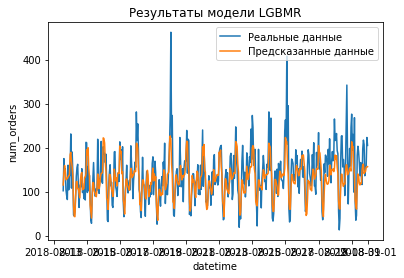

In [66]:
sns.lineplot(x=target_test.index, 
                y=target_test, label='Реальные данные')

sns.lineplot(x=target_test.index, 
                y=LGBMR_predictions, label='Предсказанные данные')

plt.legend(loc='upper right')
plt.title('Результаты модели LGBMR')
plt.show()

Теперь посмотрим на эти же данные только в течении суток

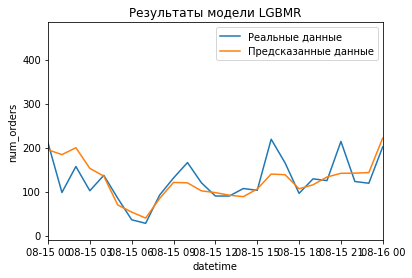

In [67]:
sns.lineplot(x=target_test.index, 
                y=target_test, label='Реальные данные')

sns.lineplot(x=target_test.index, 
                y=LGBMR_predictions, label='Предсказанные данные')

plt.legend(loc='upper right')
plt.title('Результаты модели LGBMR')
plt.xlim(pd.Timestamp('2018-08-15'), pd.Timestamp('2018-08-16'))
plt.show()

И посмотрим на последний час последнего дня в данных.

In [68]:
df_1.sort_values(by='datetime', ascending=False).head()

,num_orders,mean,std,hour,dayofweek,rolling_mean,lag_1,lag_2
datetime,,,,,,,,
2018-08-31 23:00:00,205,174.000000,34.465303,23,4,169.125000,223.0,159.0
2018-08-31 22:00:00,223,172.466667,33.485320,22,4,166.416667,159.0,154.0
2018-08-31 21:00:00,159,160.666667,43.955605,21,4,168.041667,154.0,136.0
2018-08-31 20:00:00,154,152.400000,54.650578,20,4,167.541667,136.0,207.0
2018-08-31 19:00:00,136,147.333333,57.917018,19,4,164.875000,207.0,217.0


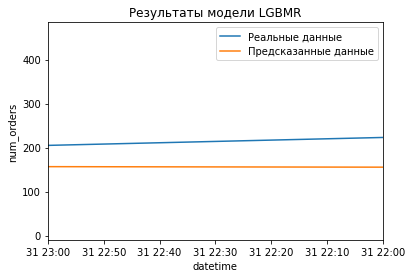

In [69]:
sns.lineplot(x=target_test.index, 
                y=target_test, label='Реальные данные')

sns.lineplot(x=target_test.index, 
                y=LGBMR_predictions, label='Предсказанные данные')

plt.legend(loc='upper right')
plt.title('Результаты модели LGBMR')
plt.xlim(pd.Timestamp('2018-08-31 23:00:00'), pd.Timestamp('2018-08-31 22:00:00'))
plt.show()

Видно, что предсказанные данные на час, близки к реальным данным. Также и на графиках выше.

**Вывод**

Проведено тестирвоание моделей и определена лучшая для работы - LGBM. Её RMSE - 40.49 (не больше 48, как и было поставлено в задаче). Отобразили на графиках реальные и предсказанные данные лучшей модели. Количество предсказанных заказов такси на следующий час - приблизительно 150. 